In [1]:
from dl1_data_handler.reader import DL1DataReaderSTAGE1, DL1DataReaderDL1DH
from ctlearn.utils import setup_DL1DataReader
from ctlearn.data_loader import KerasBatchGenerator
import yaml



2024-07-13 16:54:14.495272: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-13 16:54:14.536160: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 16:54:14.536194: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 16:54:14.536222: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 16:54:14.544602: I tensorflow/core/platform/cpu_feature_g

In [3]:
help(KerasBatchGenerator)

Help on class KerasBatchGenerator in module ctlearn.data_loader:

class KerasBatchGenerator(keras.src.utils.data_utils.Sequence)
 |  KerasBatchGenerator(DL1DataReaderDL1DH, indices, batch_size=64, mode='train', class_names=None, shuffle=True, stack_telescope_images=False, to_pc_options={'point_cloud': False, 'max_points': 500, 'relative_coords': True})
 |  
 |  Generates batches for Keras application
 |  
 |  Method resolution order:
 |      KerasBatchGenerator
 |      keras.src.utils.data_utils.Sequence
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index)
 |      Generate one batch of data
 |  
 |  __init__(self, DL1DataReaderDL1DH, indices, batch_size=64, mode='train', class_names=None, shuffle=True, stack_telescope_images=False, to_pc_options={'point_cloud': False, 'max_points': 500, 'relative_coords': True})
 |      Initialization
 |  
 |  __len__(self)
 |      Denotes the number of batches per epoch
 |  
 |  on_epoch_end(self)
 |      Updates in

In [3]:
with open('model_configs/sample_config.yml', 'r') as myconfig:
  config = yaml.load(myconfig, Loader=yaml.Loader)

In [4]:

config["Data"], data_format = setup_DL1DataReader(config, "train")
reader = DL1DataReaderSTAGE1(**config["Data"])
data_len = len(reader)
print(len(reader))
indices = list(range(data_len))
data = KerasBatchGenerator(
    reader,
    indices,
    batch_size=20,
    mode="train",
    class_names=None,
    stack_telescope_images=False,
    to_pc_options= dict({"point_cloud": True, "max_points": 500, "relative_coords": True})
)
# print(reader.shower_primary_id_to_name)
# print(reader.shower_primary_id_to_class)

8185


In [5]:
features, label = data.__getitem__(0)
for i in features.keys():
    print(i, features[i].shape)
print(label)

features (20, 500, 2)
points (20, 500, 2)
mask (20, 500, 1)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
# Mostramos los dos primeros vectores de features
print(features["features"][0][:5])
print(features["features"][1][:5])

[[   7.4563465  204.8399   ]
 [   7.465588   281.2524   ]
 [   7.4658275 -118.41391  ]
 [   7.4717283  -12.1618805]
 [   7.4703445  172.48672  ]]
[[   7.1030073 -169.4824   ]
 [   7.1121154  260.4801   ]
 [   7.103439   345.32922  ]
 [   7.11379    368.1499   ]
 [   7.1153097  135.40262  ]]


In [ ]:
import numpy as np
event = reader[0]
particletype = np.repeat(-1,20)
particletype[
    0
] = reader.shower_primary_id_to_class[
    int(event[1])
]

In [20]:
print(particletype)

[ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [22]:
print(reader.shower_primary_id_to_name)
print(reader.shower_primary_id_to_class)
print(event[1])

{0: 'gamma', 101: 'proton', 1: 'electron', 255: 'hadron', 404: 'nsb'}
{0: 0, 101: 1}
0


In [4]:
reader.class_weight


{0: 0.5990193208430913, 1: 3.024759793052476}

In [8]:
image, label = reader.__getitem__(0)

In [9]:
print(label)

0


In [5]:
print(config["Model Parameters"]["resnet"])

{'stacked_res_blocks': {'architecture': [{'blocks': 2, 'filters': 48}, {'blocks': 3, 'filters': 96}, {'blocks': 3, 'filters': 128}, {'blocks': 3, 'filters': 256}], 'residual_block': 'bottleneck'}}


In [8]:
config.get("Model Parameters",{}).get("a") == None

True

# Test con 10 imágenes

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que 'reader' y 'indices' ya están definidos y cargados
batch_size = 2

# Obtener el primer lote de datos
image_dataset = []
for i in range(10):
    features, labels = data.__getitem__(i)
    image1, image2 = features['images']
    print(labels)
    image_dataset.append(image1)
    image_dataset.append(image2)
image_dataset = np.array(image_dataset)

[[0. 1.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]]
[[0. 1.]
 [1. 0.]]


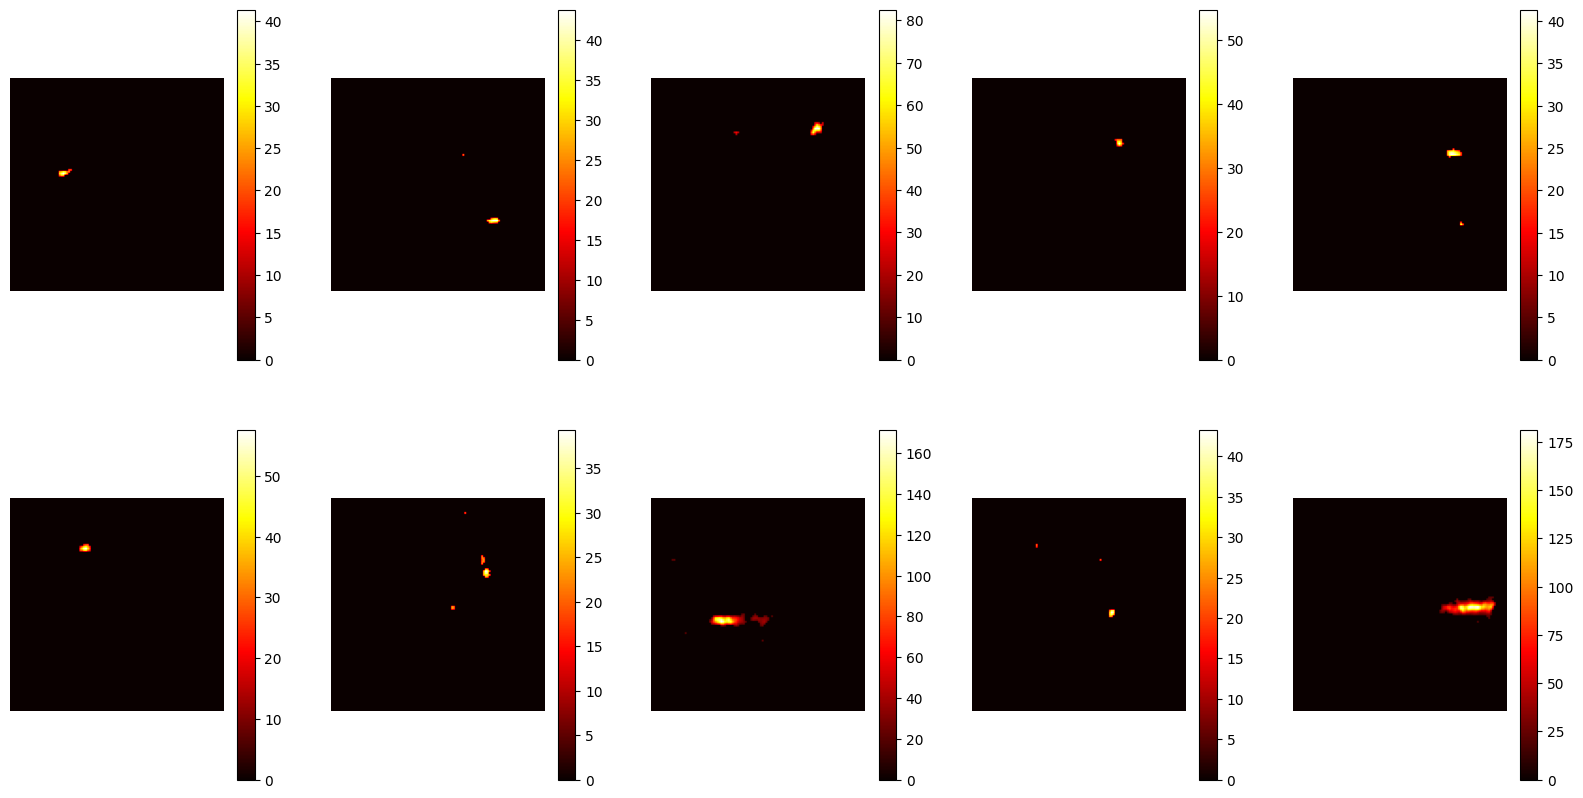

In [47]:
filter_value = 20
plt.figure(figsize=(20, 10))
for i in range(10):
  plt.subplot(2, 5, i+1)
  image = image_dataset[i,:,:,0].copy()
  image[image<filter_value] = 0
  plt.imshow(image, cmap='hot')
  plt.colorbar()
  plt.axis('off')
plt.show()
  

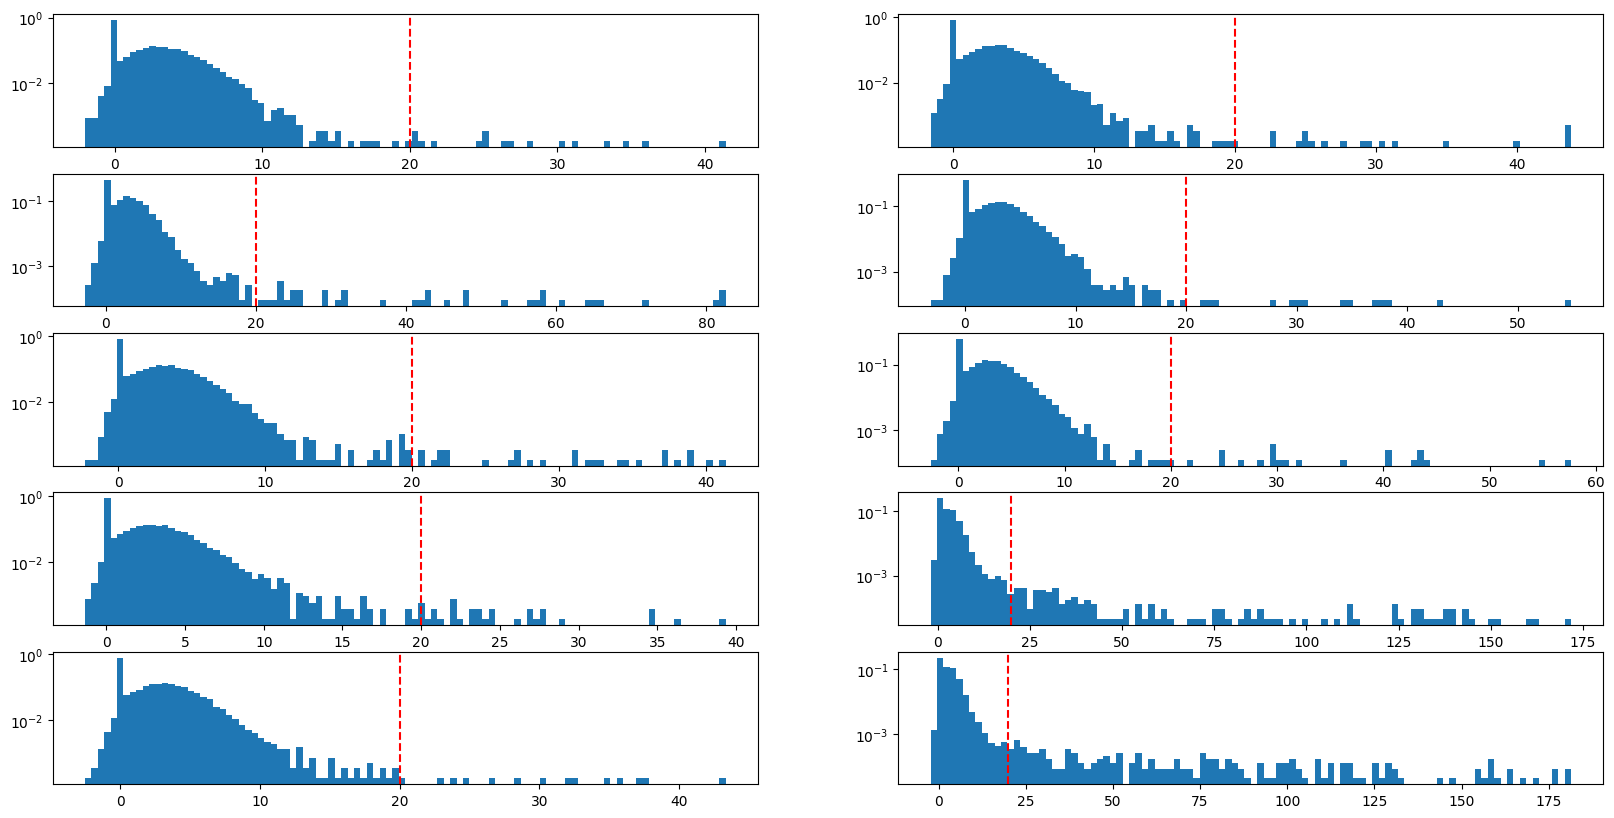

In [52]:
plt.figure(figsize=(20, 10))
for i in range(10):
  plt.subplot(5, 2, i+1)
  image = image_dataset[i,:,:,0].copy()
  plt.hist(image.ravel(), bins = 100, density=True)
  plt.axvline(x=filter_value, color='r', linestyle='--')
  plt.yscale('log')  # Establecer la escala de la y en logarítmica
plt.show()
  

In [54]:
import pandas as pd
datos_reduccion_pixel = pd.DataFrame(columns=['pixel_tot', 'pixel_filter', 'percentage'])
for i in range(10):
  image = image_dataset[i,:,:,0].copy()
  pixel_tot = np.sum(image.ravel()>0)
  pixel_filter = np.sum(image>filter_value)
  percentage = pixel_filter/pixel_tot
  datos_reduccion_pixel.loc[i] = [pixel_tot, pixel_filter, percentage]
print(datos_reduccion_pixel)


   pixel_tot  pixel_filter  percentage
0     8402.0          16.0    0.001904
1     8392.0          17.0    0.002026
2     8378.0          38.0    0.004536
3     8328.0          14.0    0.001681
4     8409.0          28.0    0.003330
5     8363.0          21.0    0.002511
6     8442.0          28.0    0.003317
7     8429.0         141.0    0.016728
8     8349.0          14.0    0.001677
9     8452.0         218.0    0.025793


## Datos todas las imágenes

In [7]:
all_data = KerasBatchGenerator(
    reader,
    indices,
    batch_size=1,
    mode="test",
    class_names=None,
    stack_telescope_images=False,
)

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filter_value = 20
# Supongamos que 'reader' y 'indices' ya están definidos y cargados

datos_reduccion_pixel = pd.DataFrame(columns=['pixel_tot', 'pixel_filter', 'percentage'])
# Obtener el primer lote de datos
# all_image_dataset = []
for i in range(len(all_data)):
    features, labels = all_data.__getitem__(i)
    image = features['images'][0,:,:,0].copy()
    pixel_tot = np.sum(image.ravel()>0)
    pixel_filter = np.sum(image.ravel()>filter_value)
    percentage = pixel_filter/pixel_tot
    datos_reduccion_pixel.loc[i] = [pixel_tot, pixel_filter, percentage]
print("Media: ", np.mean(datos_reduccion_pixel['pixel_filter']))
print("Mediana: ", np.median(datos_reduccion_pixel['pixel_filter']))
print("Desviación estándar: ", np.std(datos_reduccion_pixel['pixel_filter']))
print(datos_reduccion_pixel)
# image_dataset = np.array(image_dataset)

Media:  81.9674673152934
Mediana:  38.0
Desviación estándar:  142.53390513631885
      pixel_tot  pixel_filter  percentage
0        8391.0          49.0    0.005840
1        8377.0          15.0    0.001791
2        8392.0          24.0    0.002860
3        8407.0         147.0    0.017485
4        8401.0          11.0    0.001309
...         ...           ...         ...
3284     8390.0          26.0    0.003099
3285     8395.0          14.0    0.001668
3286     8437.0         326.0    0.038639
3287     8403.0          66.0    0.007854
3288     8388.0          19.0    0.002265

[3289 rows x 3 columns]


In [61]:
print(np.min(datos_reduccion_pixel['percentage']))
print(np.max(datos_reduccion_pixel['percentage']))

0.07362885048835462
0.4600557361820715


In [ ]:
import pandas as pd
datos_reduccion_pixel = pd.DataFrame(columns=['pixel_tot', 'pixel_filter', 'percentage'])
for i in range(10):
  image = image_dataset[i,:,:,0].copy()
  pixel_tot = np.sum(image.ravel()>0)
  pixel_filter = np.sum(image>filter_value)
  percentage = pixel_filter/pixel_tot
  datos_reduccion_pixel.loc[i] = [pixel_tot, pixel_filter, percentage]
print(datos_reduccion_pixel)


# Image to Cloud

In [16]:
data = KerasBatchGenerator(
    reader,
    indices,
    batch_size=2,
    mode="test",
    class_names=None,
    stack_telescope_images=False,
)

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que 'reader' y 'indices' ya están definidos y cargados
batch_size = 2

# Obtener el primer lote de datos
image_dataset = []
for i in range(10):
    features, labels = data.__getitem__(i)
    image1, image2 = features['images']
    image_dataset.append(image1)
    image_dataset.append(image2)
image_dataset = np.array(image_dataset)

In [71]:
class ImagetoPointCloud():
    
    def __init__(self, max_points=500, relative_coords = True):
        self.max_points = max_points
        self.relative_coords = relative_coords
    
    def get_top_n_points_coords(self, image):
        # Aplanar la matriz y obtener los índices de los n mayores valores
        flat_indices = np.argpartition(image.flatten(), -self.max_points)[-self.max_points:]
        # Obtener las coordenadas (i, j) a partir de los índices planos
        coords = np.array(np.unravel_index(flat_indices, image.shape)).T
        # Obtener los valores correspondientes a los puntos seleccionados

        return coords
    
    def process_image(self, image):
        # Variables
        mask = np.ones((self.max_points, 1), dtype=np.float32)
        features = np.zeros((self.max_points, 2), dtype=np.float32)
        points = np.zeros((self.max_points, 2), dtype=np.float32)
        
        # Generate the values
        pixel_values = image[:,:,0].copy()
        pick_time = image[:,:,1].copy()
        
        # Obtain the coords of the n points with the highest intensity value
        coords = self.get_top_n_points_coords(pixel_values)
        
        n_points = len(coords[:,0])
        if n_points < self.max_points:
            mask[n_points:] = 0
            
            features[:n_points, 0] = pixel_values[coords[:, 0], coords[:, 1]]
            features[:n_points, 1] = pick_time[coords[:, 0], coords[:, 1]]
            features[n_points:,:] = 0
            
            # Coordinates
            if self.relative_coords:
                coords = coords - self.center
            points[:n_points, 0], points[:n_points, 1] =  coords[:, 0], coords[:, 1]
            points[n_points:,:] = 0
        
        elif n_points == self.max_points:
            features[:,0] = pixel_values[coords[:, 0], coords[:, 1]]
            features[:, 1] = pick_time[coords[:, 0], coords[:, 1]]
            
            # Coordinates
            if self.relative_coords:
                coords = coords - self.center
            points[:, 0], points[:, 1] =  coords[:, 0], coords[:, 1]
        
        else:
            raise ValueError(f"Number of selected points is greater than max_points {self.max_points}. Number of selected points : {n_points}")
        
        return {"features": features, "points": points, "mask": mask}
    
    def reconstruct_image(self, features, points, mask):
        # Variables
        image = np.zeros((self.image_dims[0], self.image_dims[1], 2), dtype=np.float32)        
        # Reconstruct the image
        n_points = int(np.sum(mask))
        if n_points == 0:
            return image
        
        pixel_values = features[:n_points, 0]
        pick_time = features[:n_points, 1]
        coords = points[:n_points]
        
        if self.relative_coords:
            coords = coords + self.center
        
        coords = coords.astype(int)
        image[coords[:, 0], coords[:, 1], 0] = pixel_values
        image[coords[:, 0], coords[:, 1], 1] = pick_time
        
        return image
    
    def __call__(self, images):
        """ Call method for transform a image dataset into a point cloud dataset

        Args:
            images (np.array): Array of images with shape (n_images, height, width, channels) or (height, width, channels)

        Returns:
            dict: Dictionary with the keys "features", "points" and "mask" with the values of the point cloud as np.array
        """
        if len(images.shape) > 3:
            points_cloud = []
            for image in images:
                self.image_dims = image[:,:,0].shape
                if self.relative_coords:
                    self.center = (self.image_dims[0] // 2, self.image_dims[1] // 2)
                processed_image = self.process_image(image)  
                points_cloud.append(processed_image)
            return points_cloud
        else:
            self.image_dims = images[:,:,0].shape
            if self.relative_coords:
                self.center = (images[:,:,0].shape[0] // 2, images[:,:,0].shape[1] // 2)
            points_cloud = self.process_image(images)
        return points_cloud

In [20]:
sample_image = image_dataset[0,:,:,:]

In [28]:
def reconstruct_image(matrix, coords, points, relative = True):
    """
    Reconstruye la imagen utilizando los puntos extraídos, colocando estos en su valor original y el resto a 0.
    
    Parameters:
        matrix (np.ndarray): Matriz cuadrada de entrada.
        points (List[Tuple[int, int, float]]): Lista de tuplas (i, j, valor) de los puntos seleccionados.
    
    Returns:
        np.ndarray: Imagen reconstruida.
    """
    if not isinstance(matrix, np.ndarray) or len(matrix.shape) != 2 or matrix.shape[0] != matrix.shape[1]:
        raise ValueError("La entrada debe ser una matriz cuadrada (numpy.ndarray).")
    
    # Crear una matriz de ceros del mismo tamaño que la original
    reconstructed = np.zeros_like(matrix)
    center = (matrix.shape[0] // 2, matrix.shape[1] // 2)

    if relative:
        coords = coords + center
    for (i, j), val in zip(coords, points):
        reconstructed[i, j] = val
    
    return reconstructed

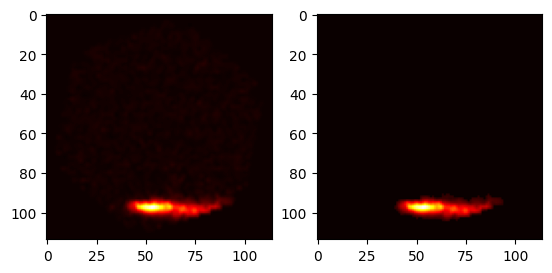

In [72]:
preprocessor_image = ImagetoPointCloud(max_points=500, relative_coords=True)
points_cloud = preprocessor_image(sample_image)
features = points_cloud['features']
points = points_cloud['points']
mask = points_cloud['mask']
rec_image = preprocessor_image.reconstruct_image(features, points, mask)

plt.subplot(1,2,1)
plt.imshow(sample_image[:,:,0], cmap = "hot")
plt.subplot(1,2,2)
plt.imshow(rec_image[:,:,0], cmap = "hot")
plt.show()

In [ ]:
image_dataset

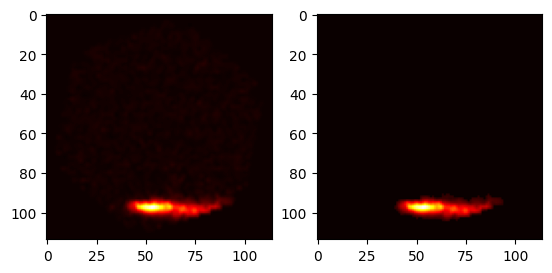

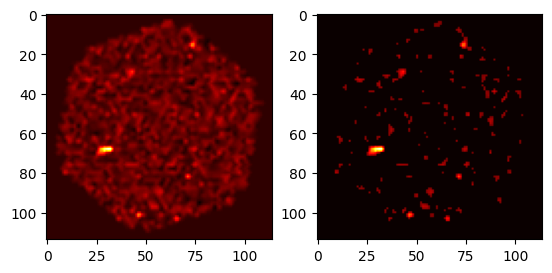

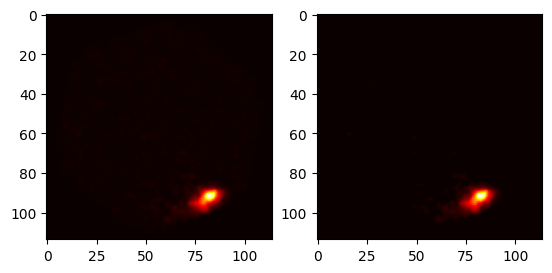

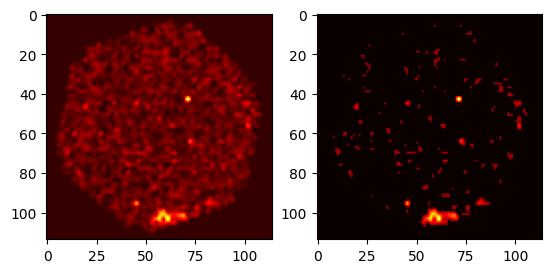

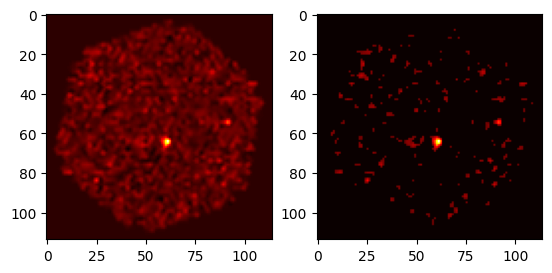

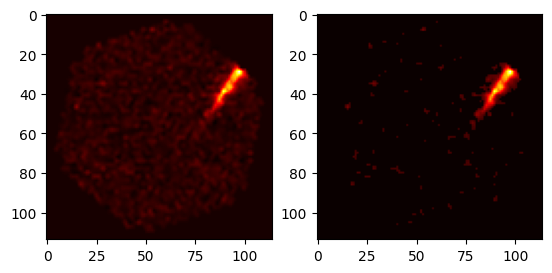

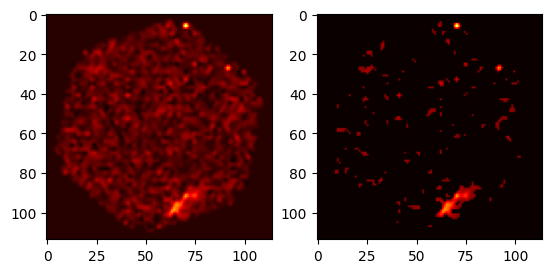

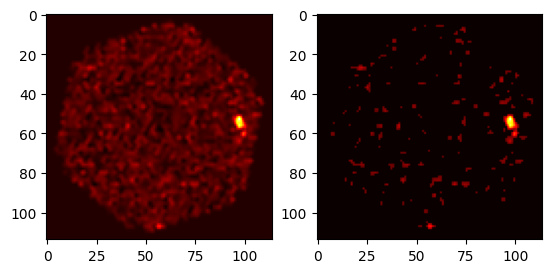

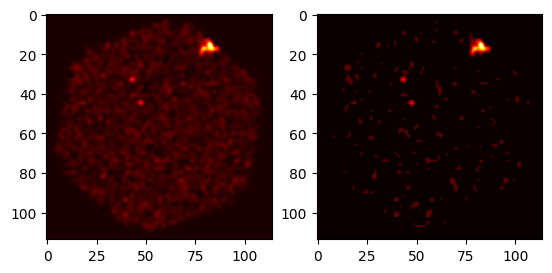

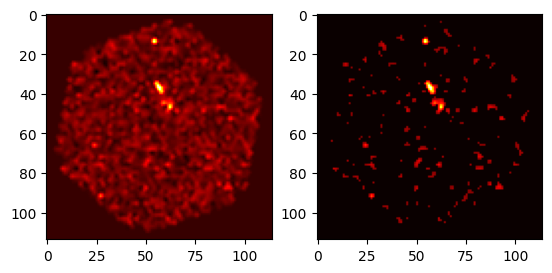

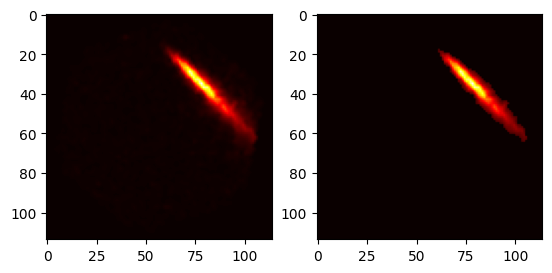

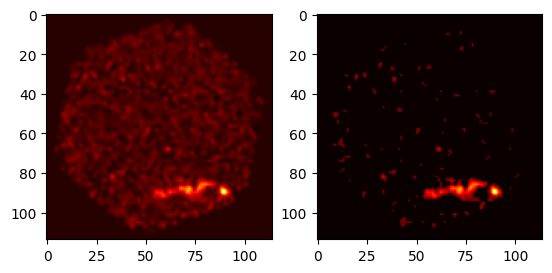

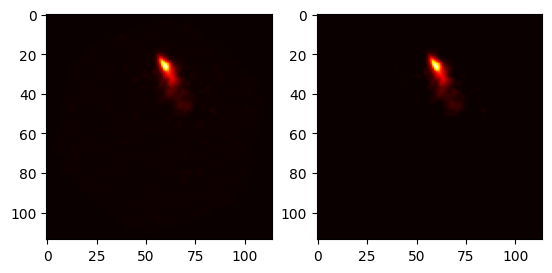

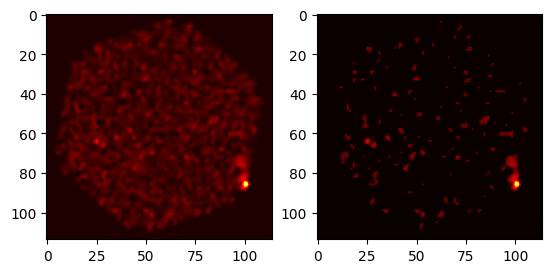

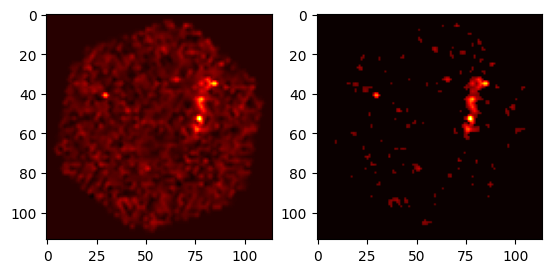

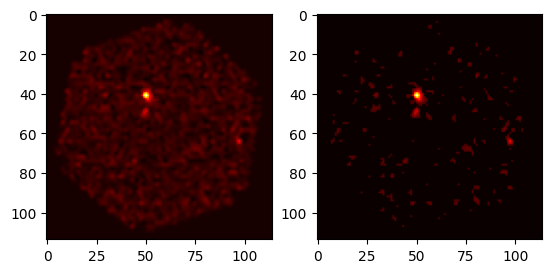

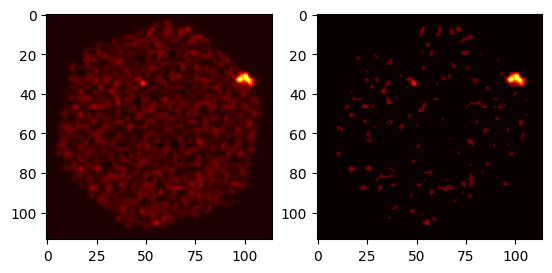

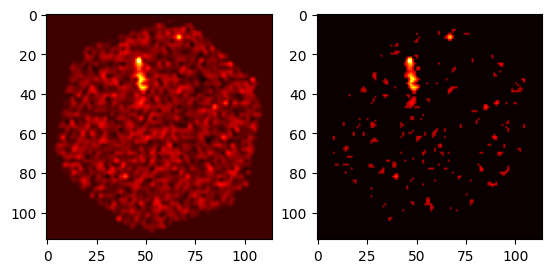

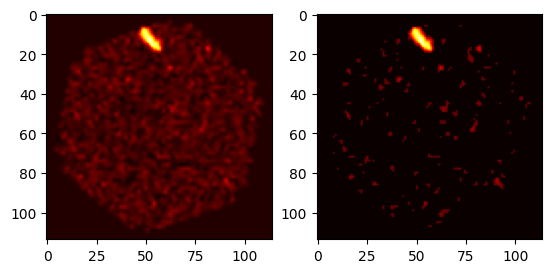

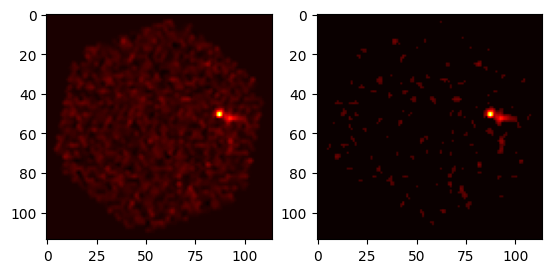

In [73]:
preprocessor_image = ImagetoPointCloud(max_points=500, relative_coords=True)
points_cloud = preprocessor_image(image_dataset)

for i in range(len(points_cloud)):
    features = points_cloud[i]['features']
    points = points_cloud[i]['points']
    mask = points_cloud[i]['mask']
    rec_image = preprocessor_image.reconstruct_image(features, points, mask)

    plt.subplot(1,2,1)
    plt.imshow(image_dataset[i,:,:,0], cmap = "hot")
    plt.subplot(1,2,2)
    plt.imshow(rec_image[:,:,0], cmap = "hot")
    plt.show()

## Transform data

In [ ]:
all_data = KerasBatchGenerator(
    reader,
    indices,
    batch_size=1,
    mode="test",
    class_names=None,
    stack_telescope_images=False,
)